We all know that the amount of calories we burn is all dependent on the number of physical movements and exercises we do.In this notebook we will look at that with the help of a dataset and solve a regression problem

# Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load and combine dataset

In [29]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')
df=pd.merge(exercise, calories, on = 'User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [30]:
df.shape

(15000, 9)

In [31]:
def detailed(data):
    ddata = pd.DataFrame(index=['total', '% missing' , 'data Type', 'range'])
    
    for cols in data.columns:
        size = data[cols].size
        pnul=round(data[cols].isna().sum()/size,2)
        nul_val = f"{pnul*100}% - {data[cols].isna().sum()}/{size}"
        dtype = 'categorical' if data[cols].dtype == object else 'Numerical' 
        rng = f"{len(data[cols].unique())} labels"\
        if dtype == 'categorical' else\
        f"{data[cols].min()}-{data[cols].max()}"
        ddata[cols] = [size,nul_val,dtype,rng]
    return ddata

In [32]:
detailed(df)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
total,15000,15000,15000,15000,15000,15000,15000,15000,15000
% missing,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000,0.0% - 0/15000
data Type,Numerical,categorical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical
range,10001159-19999647,2 labels,20-79,123.0-222.0,36.0-132.0,1.0-30.0,67.0-128.0,37.1-41.5,1.0-314.0


<AxesSubplot:>

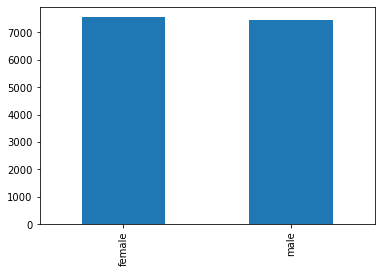

In [33]:
df['Gender'].value_counts().plot(kind='bar')

# Distribution of numeric features

In [34]:
#identify numeric data
numeric_data=df.select_dtypes(include=np.number)
   
print("Numeric Features:")
print(numeric_data.head())
print("==="*20)

Numeric Features:
    User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0  14733363   68   190.0    94.0      29.0       105.0       40.8     231.0
1  14861698   20   166.0    60.0      14.0        94.0       40.3      66.0
2  11179863   69   179.0    79.0       5.0        88.0       38.7      26.0
3  16180408   34   179.0    71.0      13.0       100.0       40.5      71.0
4  17771927   27   154.0    58.0      10.0        81.0       39.8      35.0


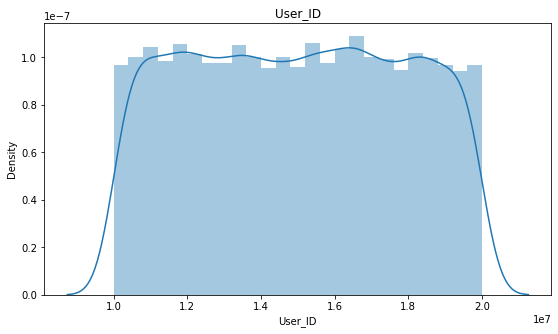

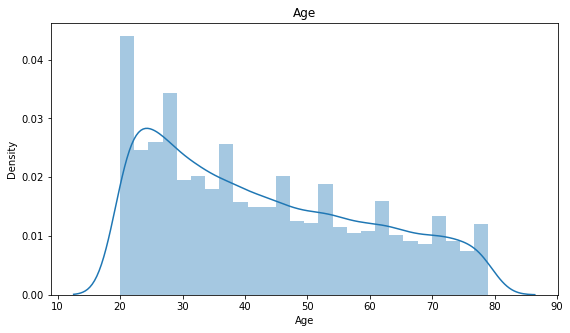

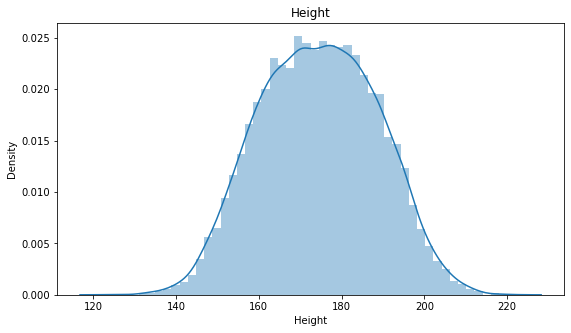

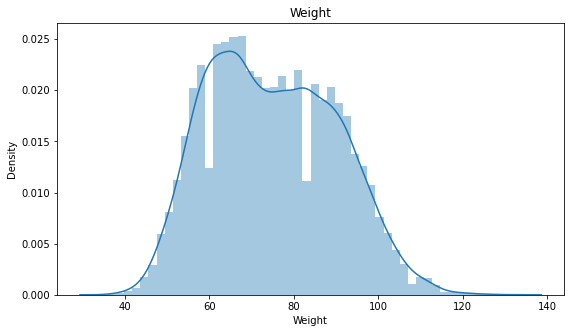

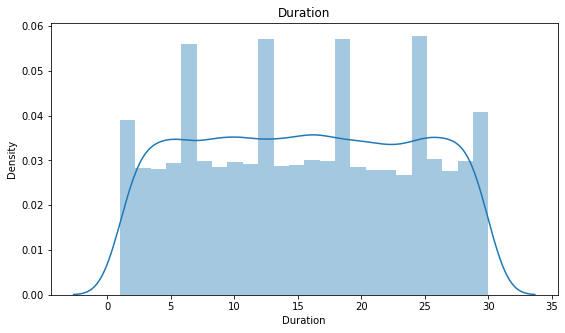

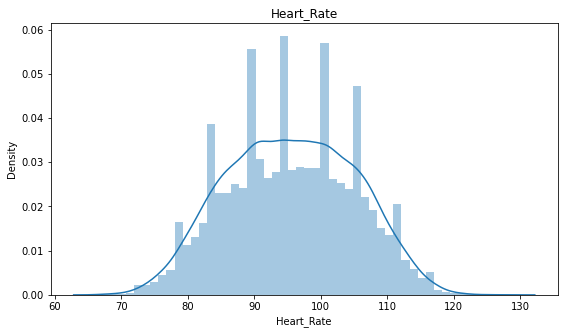

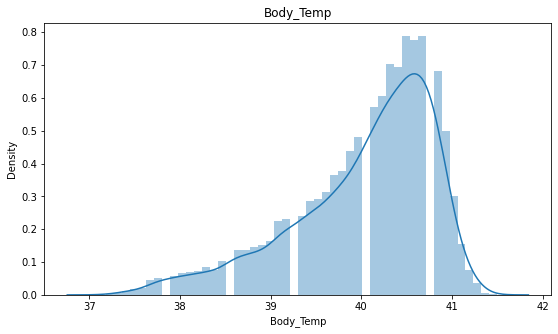

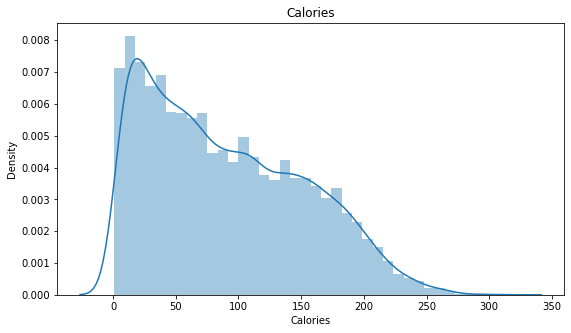

In [35]:
#plotting chart for all numerical variables
numeric_col = numeric_data.columns
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

We can ignore UserID here.Age,Calories burned and body teperature are skewed and rest of the numeric features follow a normal distribution

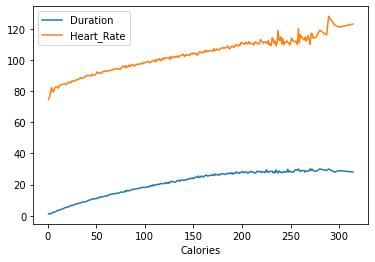

In [36]:
Calorie = df.groupby('Calories').mean()[['Duration', 'Heart_Rate']].plot.line()


1.More the duration of excercise more are the calories burned.

2.More the Heart Rate during excercise more are the calories burned.

# Scaling the features

In [37]:
df1=df.iloc[:,2:]
df1.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [38]:
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)


In [39]:
df2 = pd. DataFrame(df1_scaled,columns=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']) 
df2.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002
1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905
2,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367
3,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847
4,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263


In [40]:
df3=df.iloc[:,0:2]
df4=pd.concat([df3,df2],axis=1)

In [41]:
df4

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002
1,14861698,female,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905
2,11179863,male,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367
3,16180408,female,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847
4,17771927,female,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,-1.342179,1.299996,0.733822,-0.544614,-0.367164,0.480679,-0.713147
14996,17212577,female,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,-1.059355,-1.065401
14997,17271188,female,0.012379,-1.084691,-1.128480,0.056426,-0.575866,0.095670,-0.232801
14998,18643037,male,2.073665,1.299996,1.465441,-1.626484,-1.201975,-2.214380,-1.257540


In [42]:
df4['Gender']=df4['Gender'].map({'male':1,'female':2})

In [43]:
df4.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002
1,14861698,2,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905
2,11179863,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367
3,16180408,2,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847
4,17771927,2,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263


<AxesSubplot:>

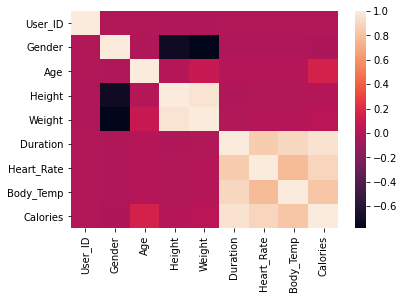

In [44]:
corr = df4.corr()
sns.heatmap(corr)

High correlation between calories burned and body temp,heart rate and duration

# Linear regression Model

In [83]:
x=df4.iloc[:,1:8]
y=df4.iloc[:,8:9]

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [86]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
preds=reg.predict(X_test)

In [88]:
r2_score(Y_test,preds)

0.9663275127619021

In [89]:
mean_squared_error(Y_test,preds)

0.034076459381859436

# Random Forest Regressor Model

In [51]:
reg1=RandomForestRegressor()
reg1.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
preds1=reg1.predict(X_test)

In [63]:
predicted = pd. DataFrame(preds1)

In [53]:
r2_score(Y_test,preds1)

0.9978184985688495

In [54]:
mean_squared_error(Y_test,preds1)

0.00220767311854404

# Checking for the best Model using Pycaret

In [55]:
!pip install pycaret

You should consider upgrading via the 'C:\Users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
from pycaret.regression import *

In [57]:
reg=setup(data=df4,target='Calories')

,Description,Value
0,session_id,2995
1,Target,Calories
2,Original Data,"(15000, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10499, 8)"


In [58]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0086,0.0002,0.0125,0.9998,0.0068,0.0323,4.5410
lightgbm,Light Gradient Boosting Machine,0.0225,0.0012,0.0338,0.9989,0.0188,0.0900,0.1600
xgboost,Extreme Gradient Boosting,0.0269,0.0015,0.0389,0.9985,0.0222,0.1123,2.5620
et,Extra Trees Regressor,0.0264,0.0018,0.0425,0.9982,0.0230,0.1037,0.7400
rf,Random Forest Regressor,0.0324,0.0027,0.0518,0.9973,0.0284,0.1289,0.8460
gbr,Gradient Boosting Regressor,0.0425,0.0036,0.0594,0.9965,0.0348,0.1687,0.3400
dt,Decision Tree Regressor,0.0613,0.0090,0.0947,0.9910,0.0515,0.2474,0.0240
ridge,Ridge Regression,0.1350,0.0333,0.1825,0.9668,0.0910,0.4803,0.0150
lar,Least Angle Regression,0.1350,0.0333,0.1825,0.9668,0.0910,0.4802,0.0110
br,Bayesian Ridge,0.1350,0.0333,0.1825,0.9668,0.0910,0.4802,0.0090


Catboost Regressor performs the best with 0.998 R2 and least error